In [1]:
from sklearn import linear_model, tree, ensemble, svm, neighbors
from sklearn import metrics
from sklearn.datasets.samples_generator import make_regression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

import pickle
import os

In [2]:
seed = 223

# Load Data

In [3]:
X, y = make_regression(n_samples=1000, n_features=10, noise=5, random_state=223)
print('X.shape: ',X.shape)

X.shape:  (1000, 10)


## Split data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print('x_train.shape: ',x_train.shape)
print('x_test.shape: ',x_test.shape)

x_train.shape:  (700, 10)
x_test.shape:  (300, 10)


# Building Models

In [5]:
ols = linear_model.LinearRegression()
ridge = linear_model.Ridge(random_state=seed)
lasso = linear_model.Lasso(random_state=seed)
elastic = linear_model.ElasticNet(random_state=seed)

dt = tree.DecisionTreeRegressor(random_state=seed)
rf = ensemble.RandomForestRegressor(random_state=seed)
ada = ensemble.AdaBoostRegressor(random_state=seed)
gt = ensemble.GradientBoostingRegressor(random_state=seed)

svr = svm.SVR()
knn = neighbors.KNeighborsRegressor()

# Training

In [6]:
ols.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)
elastic.fit(x_train,y_train)

dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
ada.fit(x_train,y_train)
gt.fit(x_train,y_train)

svr.fit(x_train,y_train)
knn.fit(x_train,y_train)

/home/jaehyuk/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jaehyuk/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

# Evaluation

In [7]:
ols_pred = ols.predict(x_test)
ridge_pred = ridge.predict(x_test)
lasso_pred = lasso.predict(x_test)
elastic_pred = elastic.predict(x_test)

dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)
ada_pred = ada.predict(x_test)
gt_pred = gt.predict(x_test)

svr_pred = svr.predict(x_test)
knn_pred = knn.predict(x_test) 

In [8]:
model_name = ['ols','ridge','lasso','elastic','dt','rf','ada','gt','svr','knn']
model = [ols, ridge, lasso , elastic, dt, rf, ada, gt, svr, knn]
pred_lst = [ols_pred, ridge_pred, lasso_pred, elastic_pred, dt_pred, rf_pred, ada_pred, gt_pred, svr_pred, knn_pred]

## Visualization

In [9]:
pred_df = pd.DataFrame(dict([model_name[i],pred_lst[i]] for i in range(len(model_name))))

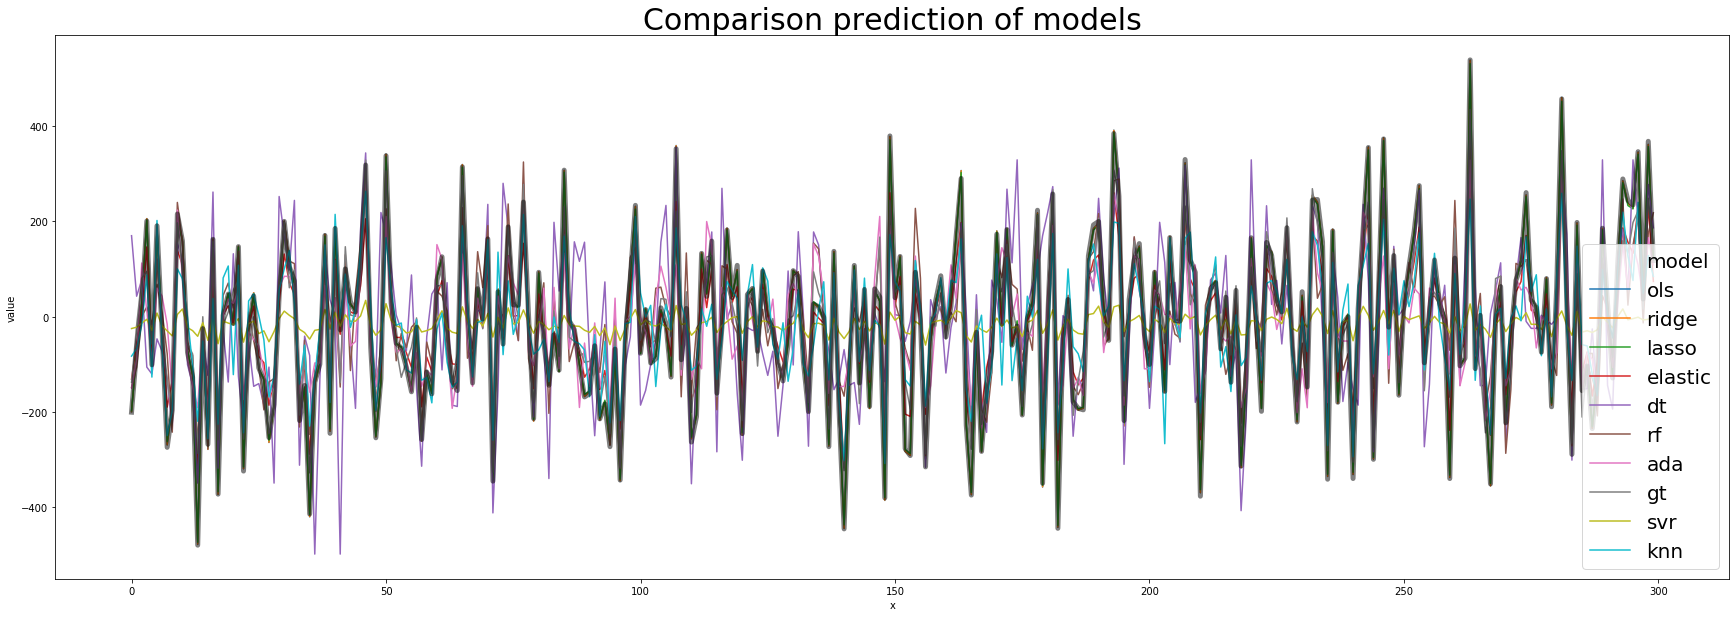

In [10]:
unstack_pred_df = pred_df.unstack().reset_index()
unstack_pred_df.columns = ['model','x','value']

plt.figure(figsize=(30,10))
sns.lineplot(x='x', y='value', hue='model', data=unstack_pred_df)
sns.lineplot(x=range(x_test.shape[0]), y=y_test, linewidth=5, color='black', alpha=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.title('Comparison prediction of models', size=30)
plt.show()

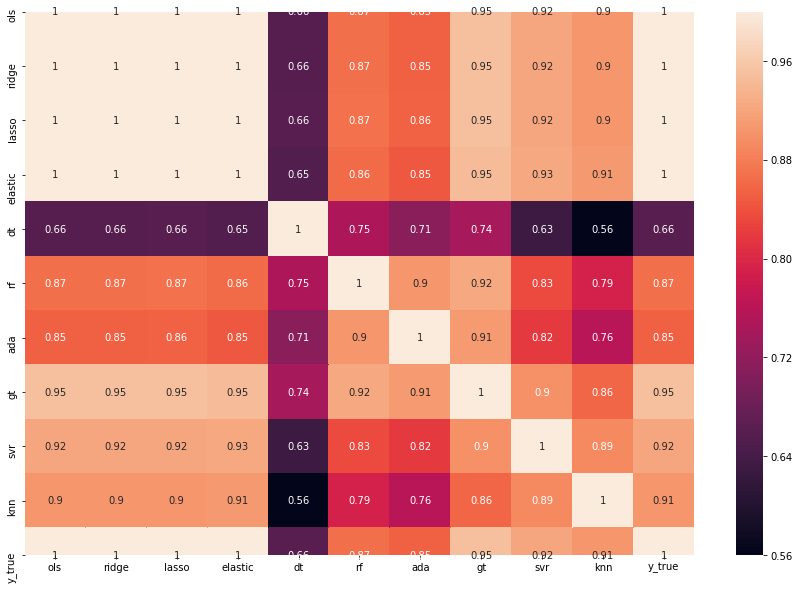

In [11]:
plt.figure(figsize=(15,10))
pred_df['y_true'] = y_test
sns.heatmap(pred_df.corr(), annot=True)
plt.show()

In [12]:
def model_eval(y_true, y_pred):
    mse = round(metrics.mean_squared_error(y_true, y_pred), 3)
    mae = round(metrics.mean_absolute_error(y_true, y_pred), 3)
    
    return mse, mae

In [13]:
eval_df = pd.DataFrame(dict([model_name[i],model_eval(y_test, pred_lst[i])] for i in range(len(model_name))),
                       index=['MSE','MAE'])

In [14]:
eval_df.T.sort_values(by='MSE')

,MSE,MAE
ridge,23.669,3.856
ols,23.678,3.851
lasso,30.562,4.419
elastic,3315.136,45.595
gt,3908.403,48.927
knn,7479.587,67.644
rf,8483.006,72.580
ada,9943.827,76.646
dt,20275.341,109.552
svr,26230.952,126.419


# Save & Load

## Save

In [15]:
for i in range(len(model_name)):
    with open(f'../save/notebook_regression/{model_name[i]}_nb_reg.pkl', 'wb') as file:
        pickle.dump(model[i], file)

In [16]:
eval_df.T.sort_values(by='MSE').to_csv('../save/notebook_regression/metrics.csv')

## Load

In [17]:
load_model = []
for i in range(len(model_name)):
    with open(f'../save/notebook_regression/{model_name[i]}_nb_reg.pkl', 'rb') as file:
        load_model.append(pickle.load(file))

In [29]:
load_eval_df = pd.DataFrame(dict([model_name[i],model_eval(y_test, load_model[i].predict(x_test))] for i in range(len(model_name))),
                            index=['MSE','MAE'])
load_eval_df.T.sort_values(by='MSE')

,MSE,MAE
ridge,23.669,3.856
ols,23.678,3.851
lasso,30.562,4.419
elastic,3315.136,45.595
gt,3908.403,48.927
knn,7479.587,67.644
rf,8483.006,72.580
ada,9943.827,76.646
dt,20275.341,109.552
svr,26230.952,126.419


In [30]:
load_eval_df.T.sort_values(by='MSE') == eval_df.T.sort_values(by='MSE')

,MSE,MAE
ridge,True,True
ols,True,True
lasso,True,True
elastic,True,True
gt,True,True
knn,True,True
rf,True,True
ada,True,True
dt,True,True
svr,True,True
